# 請結合前面的知識與程式碼，比較不同的 optimizer 與 learning rate 組合對訓練的結果與影響
### 常見的 optimizer 包含
* SGD
* RMSprop
* AdaGrad
* Adam

In [1]:
import os
import keras

# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = ""

In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [5]:
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128]):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [9]:
## 超參數設定
"""
Set your required experiment parameters
"""

OPTIM = [keras.optimizers.Adam,keras.optimizers.SGD,keras.optimizers.RMSprop,keras.optimizers.Adagrad]
LEARNING_RATE = [0.1,0.01, 0.001]
EPOCHS = 50
BATCH_SIZE = 256


In [10]:
results = {}
"""
建立你的訓練與實驗迴圈並蒐集資料
"""

for op_mtd in OPTIM:
    for lr in LEARNING_RATE:
        keras.backend.clear_session() # 把舊的 Graph 清掉
        print("Experiment with optimers = %s and lr = %.3f " % (op_mtd, lr))
        model = build_mlp(input_shape=x_train.shape[1:])
        model.summary()
        optimizer = op_mtd(lr=lr)
        model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

        model.fit(x_train, y_train, 
                  epochs=EPOCHS, 
                  batch_size=BATCH_SIZE, 
                  validation_data=(x_test, y_test), 
                  shuffle=True)

        # Collect results
        train_loss = model.history.history["loss"]
        valid_loss = model.history.history["val_loss"]
        train_acc = model.history.history["accuracy"]
        valid_acc = model.history.history["val_accuracy"]

        exp_name_tag = "exp-optimizer-%s and LR- %s" % (str(op_mtd),str(lr))
        results[exp_name_tag] = {'train-loss': train_loss,
                                 'valid-loss': valid_loss,
                                 'train-acc': train_acc,
                                 'valid-acc': valid_acc}

Experiment with optimers = <class 'tensorflow.python.keras.optimizer_v2.adam.Adam'> and lr = 0.100 
Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 3072)]            0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50

196/196 [==============================] - 2s 11ms/step - loss: 2.3070 - accuracy: 0.0984 - val_loss: 2.3078 - val_accuracy: 0.1000
Experiment with optimers = <class 'tensorflow.python.keras.optimizer_v2.adam.Adam'> and lr = 0.010 
Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 3072)]            0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,

196/196 [==============================] - 2s 11ms/step - loss: 1.8169 - accuracy: 0.3299 - val_loss: 1.8590 - val_accuracy: 0.3208
Epoch 50/50
196/196 [==============================] - 2s 11ms/step - loss: 1.8242 - accuracy: 0.3281 - val_loss: 1.8210 - val_accuracy: 0.3220
Experiment with optimers = <class 'tensorflow.python.keras.optimizer_v2.adam.Adam'> and lr = 0.001 
Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 3072)]            0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
________

196/196 [==============================] - 2s 11ms/step - loss: 0.6500 - accuracy: 0.7682 - val_loss: 1.7881 - val_accuracy: 0.5129
Epoch 49/50
196/196 [==============================] - 2s 11ms/step - loss: 0.6401 - accuracy: 0.7705 - val_loss: 1.8209 - val_accuracy: 0.5139
Epoch 50/50
196/196 [==============================] - 2s 11ms/step - loss: 0.6420 - accuracy: 0.7704 - val_loss: 1.7909 - val_accuracy: 0.5222
Experiment with optimers = <class 'tensorflow.python.keras.optimizer_v2.gradient_descent.SGD'> and lr = 0.100 
Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 3072)]            0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)           

196/196 [==============================] - 2s 11ms/step - loss: 0.7890 - accuracy: 0.7180 - val_loss: 2.0076 - val_accuracy: 0.4586
Epoch 48/50
196/196 [==============================] - 2s 11ms/step - loss: 0.7751 - accuracy: 0.7230 - val_loss: 1.7123 - val_accuracy: 0.4806
Epoch 49/50
196/196 [==============================] - 2s 11ms/step - loss: 0.7702 - accuracy: 0.7243 - val_loss: 1.7430 - val_accuracy: 0.4906
Epoch 50/50
196/196 [==============================] - 3s 13ms/step - loss: 0.7366 - accuracy: 0.7370 - val_loss: 1.6732 - val_accuracy: 0.4993
Experiment with optimers = <class 'tensorflow.python.keras.optimizer_v2.gradient_descent.SGD'> and lr = 0.010 
Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 3072)]            0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512

196/196 [==============================] - 2s 12ms/step - loss: 1.2659 - accuracy: 0.5553 - val_loss: 1.3678 - val_accuracy: 0.5115
Epoch 47/50
196/196 [==============================] - 2s 12ms/step - loss: 1.2563 - accuracy: 0.5581 - val_loss: 1.6195 - val_accuracy: 0.4388
Epoch 48/50
196/196 [==============================] - 2s 12ms/step - loss: 1.2503 - accuracy: 0.5590 - val_loss: 1.3980 - val_accuracy: 0.5009
Epoch 49/50
196/196 [==============================] - 3s 13ms/step - loss: 1.2457 - accuracy: 0.5635 - val_loss: 1.3945 - val_accuracy: 0.4981
Epoch 50/50
196/196 [==============================] - 2s 12ms/step - loss: 1.2336 - accuracy: 0.5663 - val_loss: 1.4819 - val_accuracy: 0.4818
Experiment with optimers = <class 'tensorflow.python.keras.optimizer_v2.gradient_descent.SGD'> and lr = 0.001 
Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)       

196/196 [==============================] - 3s 14ms/step - loss: 1.6990 - accuracy: 0.4082 - val_loss: 1.7007 - val_accuracy: 0.4119
Epoch 46/50
196/196 [==============================] - 3s 14ms/step - loss: 1.6952 - accuracy: 0.4096 - val_loss: 1.6977 - val_accuracy: 0.4106
Epoch 47/50
196/196 [==============================] - 3s 16ms/step - loss: 1.6916 - accuracy: 0.4114 - val_loss: 1.6968 - val_accuracy: 0.4143
Epoch 48/50
196/196 [==============================] - 3s 13ms/step - loss: 1.6881 - accuracy: 0.4113 - val_loss: 1.6935 - val_accuracy: 0.4095
Epoch 49/50
196/196 [==============================] - 2s 12ms/step - loss: 1.6846 - accuracy: 0.4125 - val_loss: 1.6907 - val_accuracy: 0.4092
Epoch 50/50
196/196 [==============================] - 2s 11ms/step - loss: 1.6809 - accuracy: 0.4143 - val_loss: 1.6836 - val_accuracy: 0.4157
Experiment with optimers = <class 'tensorflow.python.keras.optimizer_v2.rmsprop.RMSprop'> and lr = 0.100 
Model: "functional_1"
____________________

196/196 [==============================] - 3s 18ms/step - loss: 2.3082 - accuracy: 0.0983 - val_loss: 2.3166 - val_accuracy: 0.1000
Epoch 45/50
196/196 [==============================] - 3s 17ms/step - loss: 2.3080 - accuracy: 0.0996 - val_loss: 2.3072 - val_accuracy: 0.1000
Epoch 46/50
196/196 [==============================] - 3s 17ms/step - loss: 2.3073 - accuracy: 0.1013 - val_loss: 2.3108 - val_accuracy: 0.1000
Epoch 47/50
196/196 [==============================] - 4s 19ms/step - loss: 2.3075 - accuracy: 0.1013 - val_loss: 2.3137 - val_accuracy: 0.1000
Epoch 48/50
196/196 [==============================] - 4s 18ms/step - loss: 2.3081 - accuracy: 0.0990 - val_loss: 2.3210 - val_accuracy: 0.1000
Epoch 49/50
196/196 [==============================] - 3s 18ms/step - loss: 2.3079 - accuracy: 0.0993 - val_loss: 2.3155 - val_accuracy: 0.1000
Epoch 50/50
196/196 [==============================] - 3s 18ms/step - loss: 2.3076 - accuracy: 0.1014 - val_loss: 2.3182 - val_accuracy: 0.1000
Expe

196/196 [==============================] - 3s 17ms/step - loss: 1.8021 - accuracy: 0.3365 - val_loss: 1.8250 - val_accuracy: 0.3284
Epoch 44/50
196/196 [==============================] - 3s 18ms/step - loss: 1.8015 - accuracy: 0.3333 - val_loss: 1.8826 - val_accuracy: 0.3061
Epoch 45/50
196/196 [==============================] - 3s 18ms/step - loss: 1.8057 - accuracy: 0.3298 - val_loss: 1.9397 - val_accuracy: 0.2907
Epoch 46/50
196/196 [==============================] - 3s 17ms/step - loss: 1.7963 - accuracy: 0.3359 - val_loss: 1.8253 - val_accuracy: 0.3378
Epoch 47/50
196/196 [==============================] - 3s 17ms/step - loss: 1.7966 - accuracy: 0.3392 - val_loss: 1.7970 - val_accuracy: 0.3317
Epoch 48/50
196/196 [==============================] - 3s 17ms/step - loss: 1.7975 - accuracy: 0.3379 - val_loss: 1.9534 - val_accuracy: 0.2997
Epoch 49/50
196/196 [==============================] - 3s 17ms/step - loss: 1.7932 - accuracy: 0.3395 - val_loss: 1.9344 - val_accuracy: 0.3008
Epoc

196/196 [==============================] - 3s 18ms/step - loss: 0.8417 - accuracy: 0.6974 - val_loss: 1.7348 - val_accuracy: 0.4996
Epoch 43/50
196/196 [==============================] - 3s 17ms/step - loss: 0.8307 - accuracy: 0.7004 - val_loss: 1.8054 - val_accuracy: 0.4838
Epoch 44/50
196/196 [==============================] - 3s 17ms/step - loss: 0.8205 - accuracy: 0.7050 - val_loss: 1.9555 - val_accuracy: 0.4740
Epoch 45/50
196/196 [==============================] - 3s 18ms/step - loss: 0.8059 - accuracy: 0.7107 - val_loss: 1.9014 - val_accuracy: 0.4871
Epoch 46/50
196/196 [==============================] - 3s 18ms/step - loss: 0.7948 - accuracy: 0.7156 - val_loss: 1.9306 - val_accuracy: 0.4945
Epoch 47/50
196/196 [==============================] - 4s 18ms/step - loss: 0.7816 - accuracy: 0.7212 - val_loss: 1.9696 - val_accuracy: 0.4781
Epoch 48/50
196/196 [==============================] - 3s 18ms/step - loss: 0.7732 - accuracy: 0.7204 - val_loss: 2.0234 - val_accuracy: 0.4773
Epoc

196/196 [==============================] - 2s 12ms/step - loss: 0.9173 - accuracy: 0.6706 - val_loss: 1.8358 - val_accuracy: 0.4621
Epoch 42/50
196/196 [==============================] - 2s 12ms/step - loss: 0.9016 - accuracy: 0.6776 - val_loss: 1.7047 - val_accuracy: 0.4741
Epoch 43/50
196/196 [==============================] - 2s 12ms/step - loss: 0.8791 - accuracy: 0.6857 - val_loss: 1.6178 - val_accuracy: 0.4915
Epoch 44/50
196/196 [==============================] - 2s 12ms/step - loss: 0.8648 - accuracy: 0.6879 - val_loss: 1.6589 - val_accuracy: 0.4910
Epoch 45/50
196/196 [==============================] - 2s 12ms/step - loss: 0.8455 - accuracy: 0.6957 - val_loss: 1.6779 - val_accuracy: 0.4894
Epoch 46/50
196/196 [==============================] - 2s 12ms/step - loss: 0.8213 - accuracy: 0.7047 - val_loss: 1.8366 - val_accuracy: 0.4691
Epoch 47/50
196/196 [==============================] - 2s 12ms/step - loss: 0.8201 - accuracy: 0.7060 - val_loss: 1.7259 - val_accuracy: 0.4813
Epoc

196/196 [==============================] - 2s 12ms/step - loss: 1.1227 - accuracy: 0.6075 - val_loss: 1.3637 - val_accuracy: 0.5215
Epoch 41/50
196/196 [==============================] - 2s 12ms/step - loss: 1.1183 - accuracy: 0.6087 - val_loss: 1.6039 - val_accuracy: 0.4549
Epoch 42/50
196/196 [==============================] - 2s 12ms/step - loss: 1.1081 - accuracy: 0.6139 - val_loss: 1.3149 - val_accuracy: 0.5368
Epoch 43/50
196/196 [==============================] - 2s 12ms/step - loss: 1.1002 - accuracy: 0.6156 - val_loss: 1.4140 - val_accuracy: 0.5048
Epoch 44/50
196/196 [==============================] - 2s 12ms/step - loss: 1.0879 - accuracy: 0.6203 - val_loss: 1.3944 - val_accuracy: 0.5046
Epoch 45/50
196/196 [==============================] - 2s 11ms/step - loss: 1.0831 - accuracy: 0.6219 - val_loss: 1.6095 - val_accuracy: 0.4648
Epoch 46/50
196/196 [==============================] - 2s 11ms/step - loss: 1.0694 - accuracy: 0.6285 - val_loss: 1.4543 - val_accuracy: 0.5008
Epoc

196/196 [==============================] - 2s 12ms/step - loss: 1.5547 - accuracy: 0.4617 - val_loss: 1.5817 - val_accuracy: 0.4454
Epoch 40/50
196/196 [==============================] - 2s 12ms/step - loss: 1.5499 - accuracy: 0.4642 - val_loss: 1.5746 - val_accuracy: 0.4488
Epoch 41/50
196/196 [==============================] - 2s 12ms/step - loss: 1.5460 - accuracy: 0.4645 - val_loss: 1.5729 - val_accuracy: 0.4454
Epoch 42/50
196/196 [==============================] - 2s 12ms/step - loss: 1.5411 - accuracy: 0.4659 - val_loss: 1.5740 - val_accuracy: 0.4447
Epoch 43/50
196/196 [==============================] - 2s 12ms/step - loss: 1.5370 - accuracy: 0.4663 - val_loss: 1.5702 - val_accuracy: 0.4476
Epoch 44/50
196/196 [==============================] - 2s 12ms/step - loss: 1.5327 - accuracy: 0.4686 - val_loss: 1.5568 - val_accuracy: 0.4557
Epoch 45/50
196/196 [==============================] - 2s 12ms/step - loss: 1.5284 - accuracy: 0.4698 - val_loss: 1.5739 - val_accuracy: 0.4462
Epoc

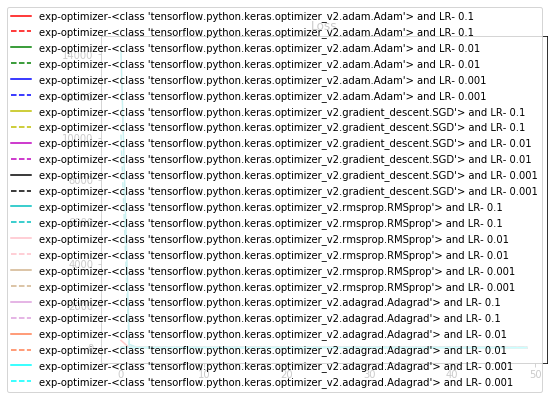

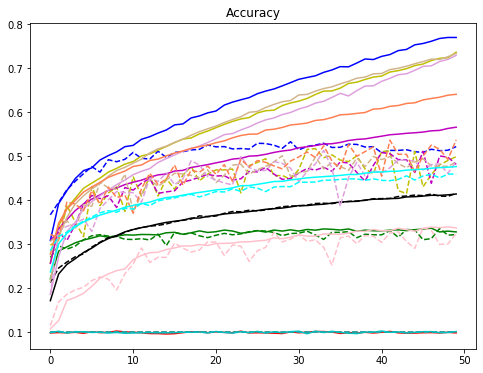

In [21]:
import matplotlib.pyplot as plt
%matplotlib inline

"""
將實驗結果繪出
"""

import matplotlib.pyplot as plt
%matplotlib inline
color_bar = ["r", "g", "b", "y", "m", "k", "c", "pink", "tan", "plum", "coral", 'cyan']

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend(loc='right')
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
#plt.legend('right')
plt.show()